# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#api_key = weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#debugging no more than 60 per min
cities=cities[0:50]
cities

['mawlaik',
 'puqi',
 'bredasdorp',
 'hurghada',
 'bengkulu',
 'rikitea',
 'ribeira grande',
 'clyde river',
 'sturgeon falls',
 'albany',
 'saint anthony',
 'vaini',
 'barrow',
 'east london',
 'chicama',
 'cape town',
 'genthin',
 'mataura',
 'chokurdakh',
 'barentsburg',
 'jaumave',
 'carnarvon',
 'utiroa',
 'constantine',
 'wanderlandia',
 'hirara',
 'caravelas',
 'pecanha',
 'saint george',
 'yenagoa',
 'palabuhanratu',
 'mehamn',
 'hermanus',
 'tuktoyaktuk',
 'castro',
 'saskylakh',
 'port alfred',
 'mitzic',
 'sisimiut',
 'kahului',
 'georgetown',
 'hilo',
 'muslyumovo',
 'coahuayana',
 'hithadhoo',
 'santa maria',
 'ushuaia',
 'provideniya',
 'taolanaro',
 'longyearbyen']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

weather_url = f"{url}appid={weather_api_key}&units={units}"
# weather_url


In [4]:
city_data_list = []

#number
number=0
series_number = 1
# Include a print log of each city as it'sbeing processed (with the city number and city name).
for city in cities:
    city_dict = {}
    try:
        query_url = f'{weather_url}&q={city}'
        
        response = requests.get(query_url).json()
        print(response)
        city_dict['city'] = city
        city_dict['temp_max']= response['main']['temp_max']
        city_dict['humidity']= response['main']['humidity']
        city_dict['clouds']= response['clouds']['all']
        city_dict['windspeed']= response['wind']['speed']
        city_dict['lat']=response['coord']['lat']
        city_dict['lng']= response['coord']['lon']
        city_dict['country']= response['sys']['country']
        city_dict['date']= (response['dt'])
        #append to list
        city_data_list.append(city_dict)
#         if number % 50:
#             time.sleep(60)
#             number = 1
#             series_number += 1
#             city_data_list(city_dict)
#         else:
#             number += 1
#             city_data_list(city)
        print("- Processing next 50 -")
        print("---------------------")
        print(f'{city} is {number} of {len(cities)}')
    except:
        print('City not found. Skipping...')
        pass
        
print("-----------------------")       
print("Processing Finished!")

{'coord': {'lon': 94.4167, 'lat': 23.6333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 58.19, 'feels_like': 55.13, 'temp_min': 58.19, 'temp_max': 58.19, 'pressure': 1015, 'humidity': 51, 'sea_level': 1015, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 305}, 'clouds': {'all': 13}, 'dt': 1612724733, 'sys': {'country': 'MM', 'sunrise': 1612743583, 'sunset': 1612784003}, 'timezone': 23400, 'id': 1310120, 'name': 'Mawlaik', 'cod': 200}
- Processing next 50 -
---------------------
mawlaik is 0 of 50
{'coord': {'lon': 113.8833, 'lat': 29.7167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 49.41, 'feels_like': 46.08, 'temp_min': 49.41, 'temp_max': 49.41, 'pressure': 1025, 'humidity': 89, 'sea_level': 1025, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 27}, 'rain': {'1h': 0.562}, 'clo

{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.66, 'feels_like': 54.41, 'temp_min': 66, 'temp_max': 69.01, 'pressure': 1015, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 25.32, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1612724496, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1612671238, 'sunset': 1612720019}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
- Processing next 50 -
---------------------
cape town is 0 of 50
{'coord': {'lon': 12.1667, 'lat': 52.4}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 20.7, 'feels_like': 13.01, 'temp_min': 18, 'temp_max': 21.99, 'pressure': 1006, 'humidity': 78}, 'visibility': 674, 'wind': {'speed': 4, 'deg': 224, 'gust': 5.99}, 'snow': {'1h': 0.65}, 'clouds': {'all': 100}, 'dt': 1612724735, 'sys': {'type': 3, 'id'

{'coord': {'lon': -133.0374, 'lat': 69.4541}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -25.6, 'feels_like': -43.64, 'temp_min': -25.6, 'temp_max': -25.6, 'pressure': 1037, 'humidity': 75}, 'visibility': 9656, 'wind': {'speed': 19.57, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1612724736, 'sys': {'type': 1, 'id': 942, 'country': 'CA', 'sunrise': 1612720632, 'sunset': 1612743329}, 'timezone': -25200, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
- Processing next 50 -
---------------------
tuktoyaktuk is 0 of 50
{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.24, 'feels_like': 75.69, 'temp_min': 76.24, 'temp_max': 76.24, 'pressure': 1011, 'humidity': 47, 'sea_level': 1011, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 157}, 'clouds': {'all': 0}, 'dt': 1612724736,

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 15.8, 'feels_like': -2.47, 'temp_min': 15.8, 'temp_max': 15.8, 'pressure': 1034, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 21.85, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1612724737, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
- Processing next 50 -
---------------------
longyearbyen is 0 of 50
-----------------------
Processing Finished!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"
#convert to dataframe
weather_data = pd.DataFrame(city_data_list)
weather_data.to_csv(output_data_file)
weather_data.head()

,city,temp_max,humidity,clouds,windspeed,lat,lng,country,date
0,mawlaik,58.19,51,13,1.54,23.6333,94.4167,MM,1612724733
1,puqi,49.41,89,100,4.38,29.7167,113.8833,CN,1612724733
2,bredasdorp,68.00,60,3,10.36,-34.5322,20.0403,ZA,1612724733
3,hurghada,68.00,56,0,2.86,27.2574,33.8129,EG,1612724733
4,bengkulu,76.05,85,100,6.93,-3.8004,102.2655,ID,1612724733


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data['city'].index('humidity')







TypeError: 'RangeIndex' object is not callable

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

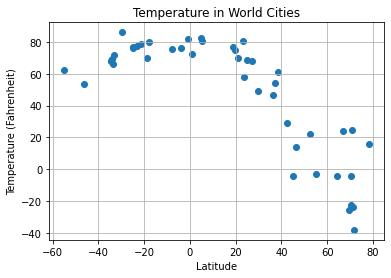

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

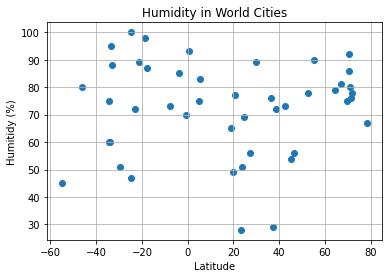

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humitidy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

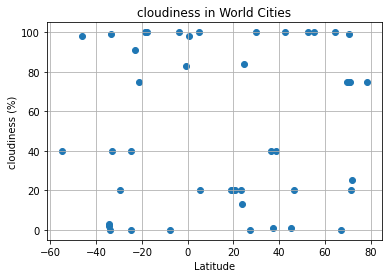

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("cloudiness in World Cities")
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

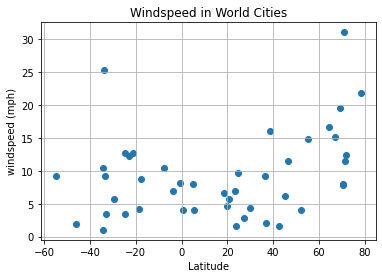

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed in World Cities")
plt.ylabel("windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression